In [1]:
%matplotlib notebook

In [2]:
import matplotlib

params = {
#     'text.latex.preamble': ['\\usepackage{gensymb}'],
#     'image.origin': 'lower',
#     'image.interpolation': 'nearest',
#     'image.cmap': 'gray',
#     'axes.grid': False,
    'savefig.dpi': 300, 
    'xtick.direction': 'in',
    'ytick.direction': 'in',
#     'axes.labelsize': 12,
#     'axes.titlesize': 12,
    'font.size': 16, 
#     'legend.fontsize': 15, 
#     'xtick.labelsize': 15,
#     'ytick.labelsize': 15,
     'text.usetex': True,
     'font.family': 'serif',
#    "font.family": "Arial",
}

matplotlib.rcParams.update(params)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# SNR recovery plots

## First FDMT snr recovery

In [4]:
fdmt_snrs = pd.read_csv("../FDMT_tests/noc_fdmt_performance_nch_256_bw_256_0_to_1000_step_0.1_with_bz_spp_0.5.txt", sep="\s+")

In [5]:
fdmt_snrs

,DM,MF_snr,Max_snr,FDMT_dm,FDMT_snr,BZ_FDMT_dm,BZ_FDMT_snr
0,0.0,16000.00,16000.00,0,16000.00,0.0,16000.00
1,0.1,16000.00,16000.00,0,16000.00,0.0,16000.00
2,0.2,16000.00,16000.00,0,16000.00,0.0,16000.00
3,0.3,16000.00,16000.00,0,16000.00,0.0,16000.00
4,0.4,16000.00,16000.00,0,16000.00,0.0,16000.00
...,...,...,...,...,...,...,...
9995,999.5,7932.35,7223.46,996,5965.65,999.0,7017.37
9996,999.6,7939.58,7223.46,996,5956.98,999.0,6983.94
9997,999.7,7931.32,7223.46,996,5932.63,999.0,6936.42
9998,999.8,7927.53,7223.46,998,5945.97,1000.0,6964.95


<IPython.core.display.Javascript object>


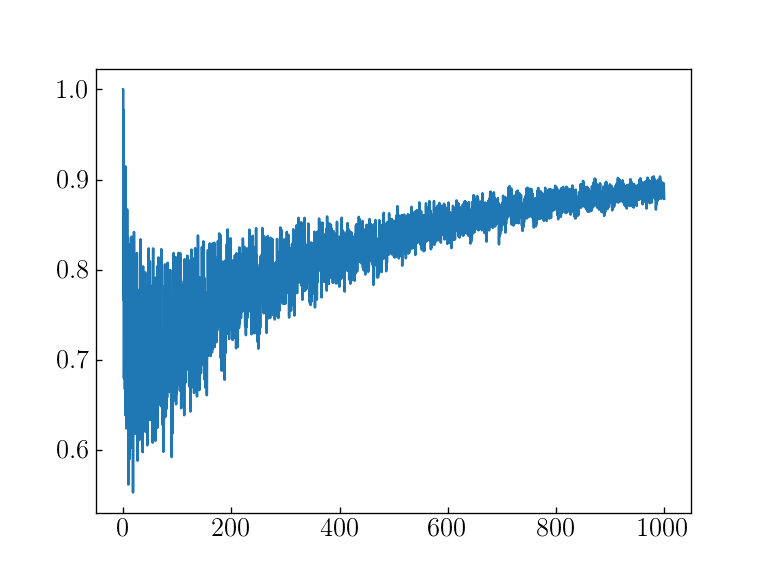

In [6]:
plt.figure()
plt.plot(fdmt_snrs['DM'][::2], fdmt_snrs['BZ_FDMT_snr'][::2] / fdmt_snrs['MF_snr'][::2])

## ESAM 0.8 SNR recovery

In [7]:
esam_snrs_p8 = pd.read_csv("final_esam_snr_recovery_fine_dm_grid_dm_0_1000_0.2_using_final_optimised_esam_tree_fast_with_traces_0_1000_0.1_nch256_threshold_0.8.pkl.npy.txt", sep="\s+")

In [8]:
esam_snrs_p8.keys()

Index(['DM', 'MF_snr', 'Max_snr', 'ESAM_dm', 'ESAM_snr'], dtype='object')

<IPython.core.display.Javascript object>


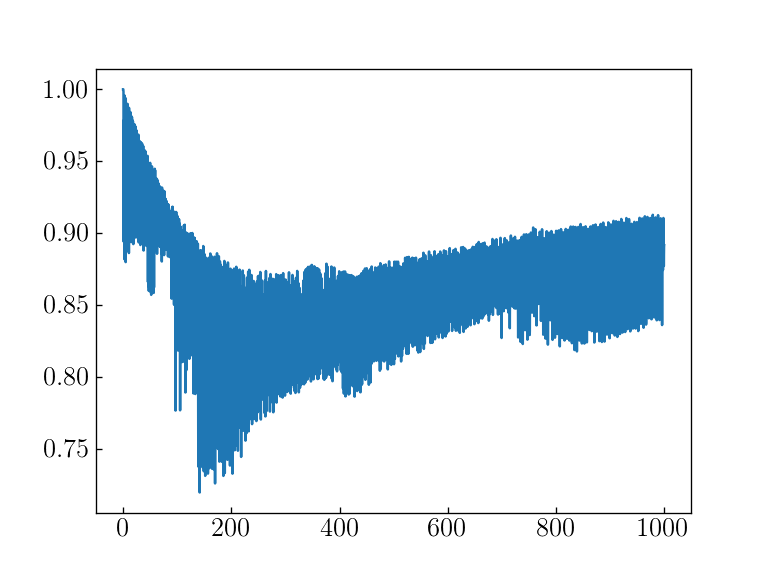

In [9]:
plt.figure()
plt.plot(esam_snrs_p8['DM'], esam_snrs_p8['ESAM_snr'] / esam_snrs_p8['MF_snr'])

## ESAM 0.9 recovery

In [10]:
esam_snrs_p9 = pd.read_csv("final_esam_snr_recovery_fine_dm_grid_dm_0_1000_0.2_using_final_optimised_esam_tree_fast_with_traces_0_1000_0.1_nch256_threshold_0.9.pkl.npy.txt", sep="\s+")

<IPython.core.display.Javascript object>


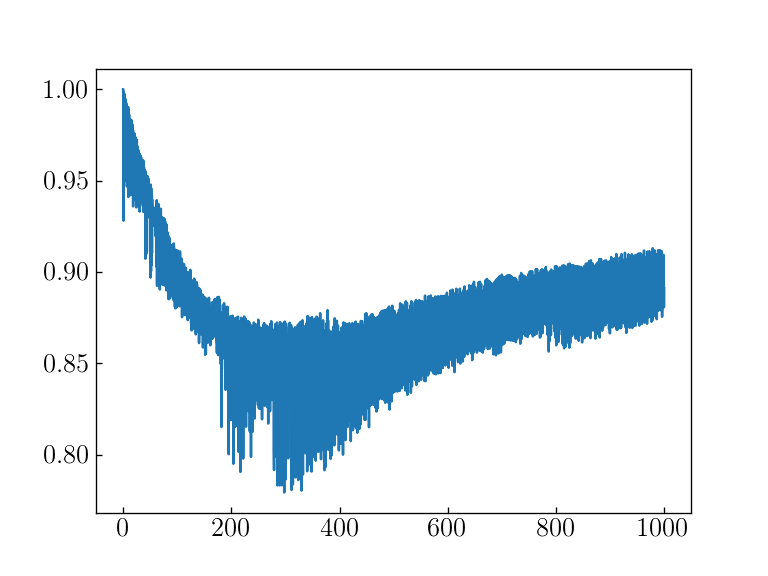

In [11]:
plt.figure()
plt.plot(esam_snrs_p9['DM'], esam_snrs_p9['ESAM_snr'] / esam_snrs_p9['MF_snr'])

<IPython.core.display.Javascript object>


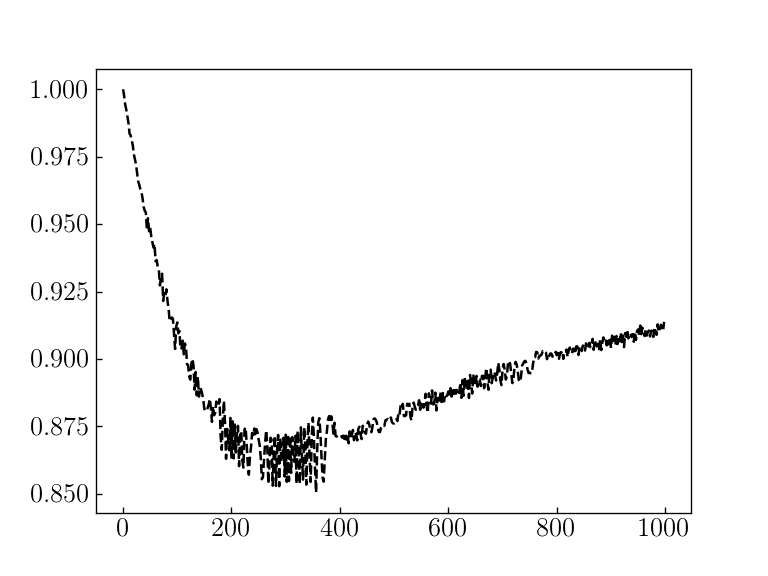

In [12]:
#Theoretical curve

plt.figure()
plt.plot(esam_snrs_p9['DM'][::10], esam_snrs_p9['Max_snr'][::10] / esam_snrs_p9['MF_snr'][::10], 'k--')

## Now all of them together

In [13]:
f_low = 800.5 * 1e-3
f_top = f_low + 255
tstamp = 1
D = 4.15 #ms

def dm_samp_to_pccc(dm_samps):
    '''
    dm_samps : int
    f_low, f_top : in GHz
    tstamp : ms
    '''
    dm_ms = dm_samps * tstamp
    DM = dm_ms / D / (f_low**-2 - f_top**-2)
    return DM

def dm_pccc_to_samp(dm_pccc):
    '''
    dm_pccc : DM in pc/cc
    f_low, f_top : in GHz
    tstamp : ms
    '''
    dm_ms = dm_pccc * D * (f_low**-2 - f_top**-2)
    dm_samps = int(dm_ms / tstamp)
    return dm_samps

<IPython.core.display.Javascript object>


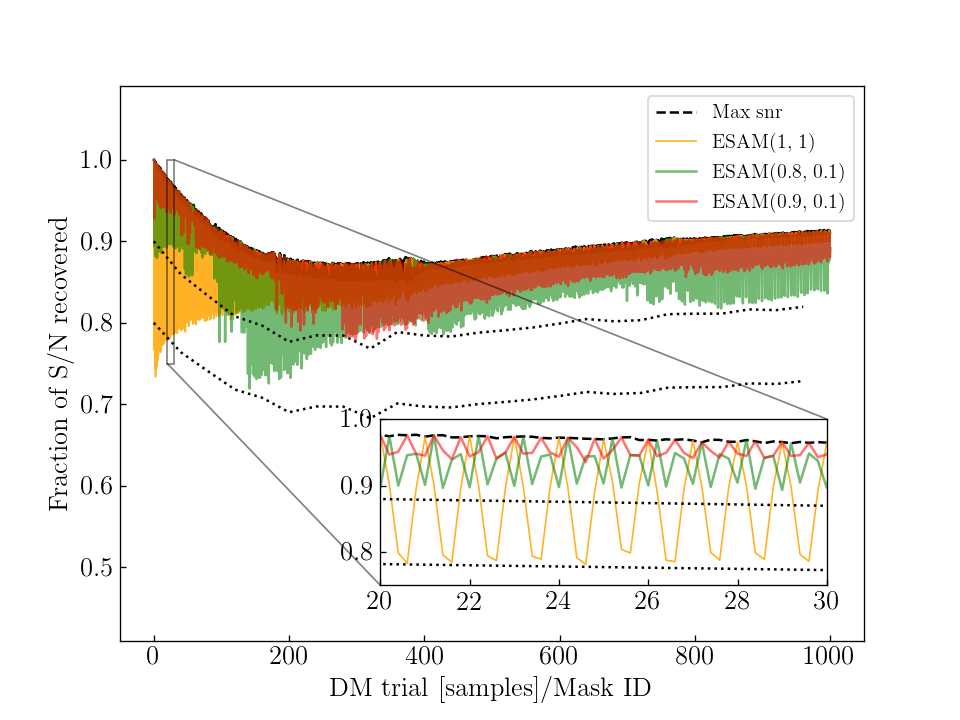

In [42]:
# set up main fig/axes
fig, main_ax = plt.subplots(figsize=(8,6))
inset_ax = main_ax.inset_axes(
   [0.35, 0.1, 0.6, 0.3],  # [x, y, width, height] w.r.t. axes
   xlim=[20, 30], ylim=[0.75, 1.0], # sets viewport & tells relation to main axes
   # xticklabels=[], yticklabels=[]
)

# add plot content


for ax in main_ax, inset_ax:
    ax.plot(esam_snrs_p9['DM'][::1], esam_snrs_p9['Max_snr'][::1] / esam_snrs_p9['MF_snr'][::1], 'k--', label="Max snr")
    #ax.plot(fdmt_snrs['DM'][::2], fdmt_snrs['BZ_FDMT_snr'][::2] / fdmt_snrs['MF_snr'][::2], alpha=0.55, label="FDMT")
    ax.plot(esam_snrs_1['DM'].iloc[0:-2], esam_snrs_1['ESAM_snr'].iloc[0:-2]/esam_snrs_1['MF_snr'].iloc[0:-2], alpha=0.85, c='orange', lw=1,label="ESAM(1, 1)")

    ax.plot(esam_snrs_p8['DM'], esam_snrs_p8['ESAM_snr'] / esam_snrs_p8['MF_snr'], alpha=0.55, c='g', label="ESAM(0.8, 0.1)")
    ax.plot(esam_snrs_p9['DM'], esam_snrs_p9['ESAM_snr'] / esam_snrs_p9['MF_snr'], alpha=0.55, c='r', label="ESAM(0.9, 0.1)")
    
    ax.plot(esam_snrs_p9['DM'][::200], 0.9*esam_snrs_p9['Max_snr'][::200] / esam_snrs_p9['MF_snr'][::200], 'k:')
    ax.plot(esam_snrs_p9['DM'][::200], 0.8*esam_snrs_p9['Max_snr'][::200] / esam_snrs_p9['MF_snr'][::200], 'k:')
    

    
#secax = main_ax.secondary_xaxis('top', functions=(dm_samp_to_pccc, dm_pccc_to_samp))
#secax.set_xlabel('DM trial [pc/cc]')


main_ax.set_ylim(0.41, 1.09)
main_ax.legend(loc='upper right', prop={'size': 12})

# add zoom leaders
main_ax.indicate_inset_zoom(inset_ax, edgecolor="black")

main_ax.set_ylabel("Fraction of S/N recovered")
main_ax.set_xlabel("DM trial [samples]/Mask ID")

fig.savefig("Frac of snr_esam_algos.png")

In [25]:
esam_snrs_1 = pd.read_csv("final_esam_snr_recovery_fine_dm_grid_dm_0_1000_0.2_using_final_optimised_esam_tree_fast_with_traces_0_1000_1.0_nch256_threshold_1.0.pkl.npy.txt", sep="\s+")

In [26]:
esam_snrs_1.keys()

Index(['DM', 'MF_snr', 'Max_snr', 'ESAM_dm', 'ESAM_snr'], dtype='object')

In [27]:
bf_snrs = pd.read_csv("optimised_trees/final_bf_snr_recovery_fine_dm_grid_dm_0_1000_0.1_using_nch=256.txt", sep="\s+")

In [28]:
bf_snrs.keys()

Index(['DM', 'MF_snr', 'Max_snr', 'BF_dm', 'BF_snr'], dtype='object')

<IPython.core.display.Javascript object>


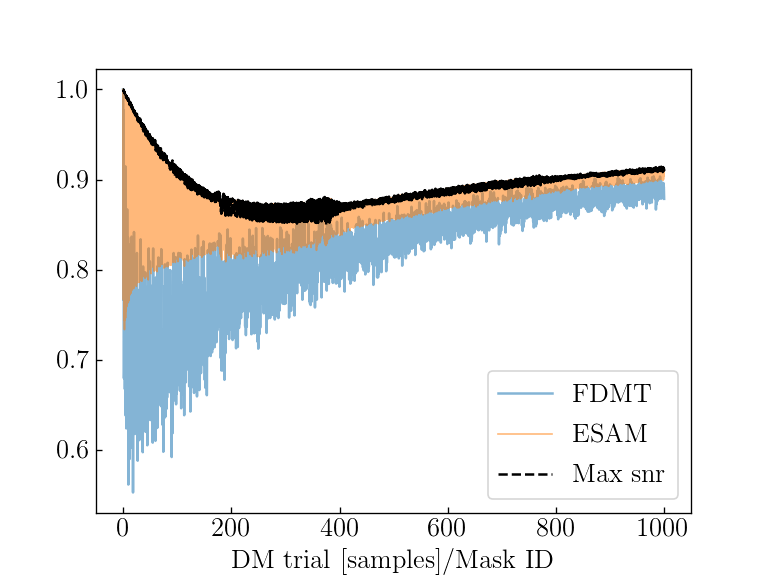

Text(0.5, 0, 'DM trial [samples]/Mask ID')

In [29]:
plt.figure()
plt.plot(fdmt_snrs['DM'][::2], fdmt_snrs['BZ_FDMT_snr'][::2] / fdmt_snrs['MF_snr'][::2], alpha=0.55, label="FDMT")
plt.plot(esam_snrs_1['DM'].iloc[0:-2], esam_snrs_1['ESAM_snr'].iloc[0:-2]/esam_snrs_1['MF_snr'].iloc[0:-2], alpha=0.55, lw=1,label="ESAM")
plt.plot(esam_snrs_p9['DM'][::1], esam_snrs_p9['Max_snr'][::1] / esam_snrs_p9['MF_snr'][::1], 'k--', label="Max snr")

plt.legend()
plt.xlabel("DM trial [samples]/Mask ID")

<IPython.core.display.Javascript object>


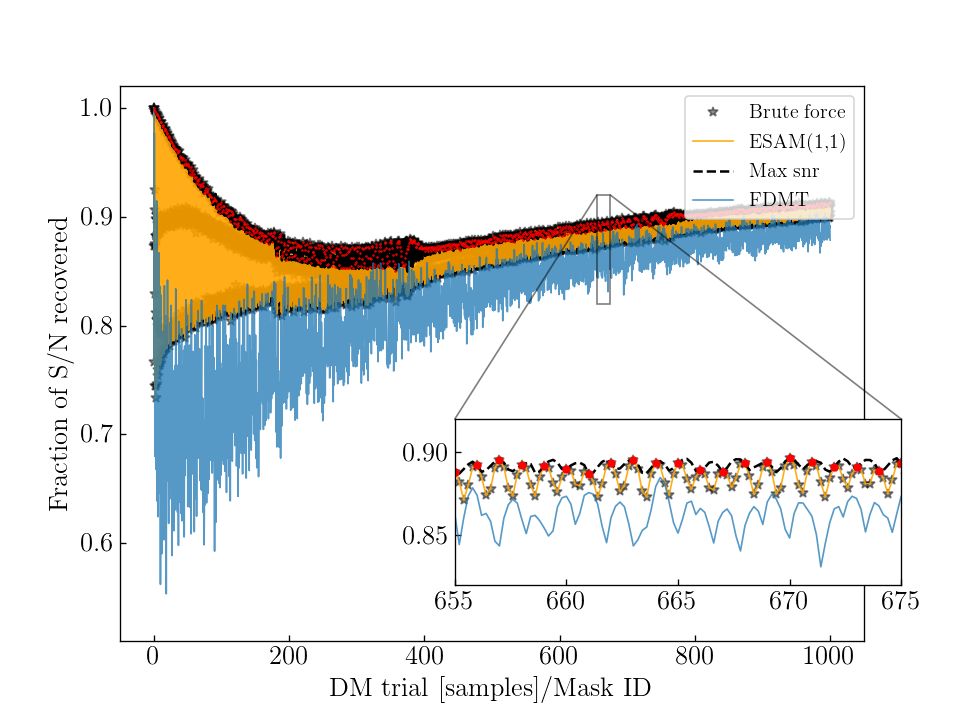

In [30]:
# set up main fig/axes
fig, main_ax = plt.subplots(figsize=(8,6))
inset_ax = main_ax.inset_axes(
   [0.45, 0.1, 0.6, 0.3],  # [x, y, width, height] w.r.t. axes
   xlim=[655, 675], ylim=[0.82, 0.92], # sets viewport & tells relation to main axes
   # xticklabels=[], yticklabels=[]
)

# add plot content


for ax in main_ax, inset_ax:
    
    ax.plot(bf_snrs['DM'][::2], bf_snrs['BF_snr'][::2] / bf_snrs['MF_snr'][::2], '*', alpha=0.45, lw=0.1, c='black', label="Brute force")
    ax.plot(esam_snrs_1['DM'].iloc[0:-2], esam_snrs_1['ESAM_snr'].iloc[0:-2]/esam_snrs_1['MF_snr'].iloc[0:-2], 'orange', alpha=0.9, lw=1,label="ESAM(1,1)")
    ax.plot(esam_snrs_p9['DM'][::1], esam_snrs_p9['Max_snr'][::1] / esam_snrs_p9['MF_snr'][::1], 'k--', label="Max snr")
    ax.plot(fdmt_snrs['DM'][::2], fdmt_snrs['BZ_FDMT_snr'][::2] / fdmt_snrs['MF_snr'][::2], alpha=0.75, lw=1, label="FDMT")
    
    ax.plot(esam_snrs_1['DM'].iloc[0:-2:5], esam_snrs_1['ESAM_snr'].iloc[0:-2:5]/esam_snrs_1['MF_snr'].iloc[0:-2:5], 'r.',ms=1)
inset_ax.plot(esam_snrs_1['DM'].iloc[0:-2:5], esam_snrs_1['ESAM_snr'].iloc[0:-2:5]/esam_snrs_1['MF_snr'].iloc[0:-2:5], 'r.',ms=8)


    
#secax = main_ax.secondary_xaxis('top', functions=(dm_samp_to_pccc, dm_pccc_to_samp))
#secax.set_xlabel('DM trial [pc/cc]')


main_ax.set_ylim(0.51, 1.02)
main_ax.legend(loc='upper right', prop={'size': 12})
# add zoom leaders
main_ax.indicate_inset_zoom(inset_ax, edgecolor="black")

main_ax.set_ylabel("Fraction of S/N recovered")
main_ax.set_xlabel("DM trial [samples]/Mask ID")

fig.savefig("Frac of snr esam1.png")

<IPython.core.display.Javascript object>


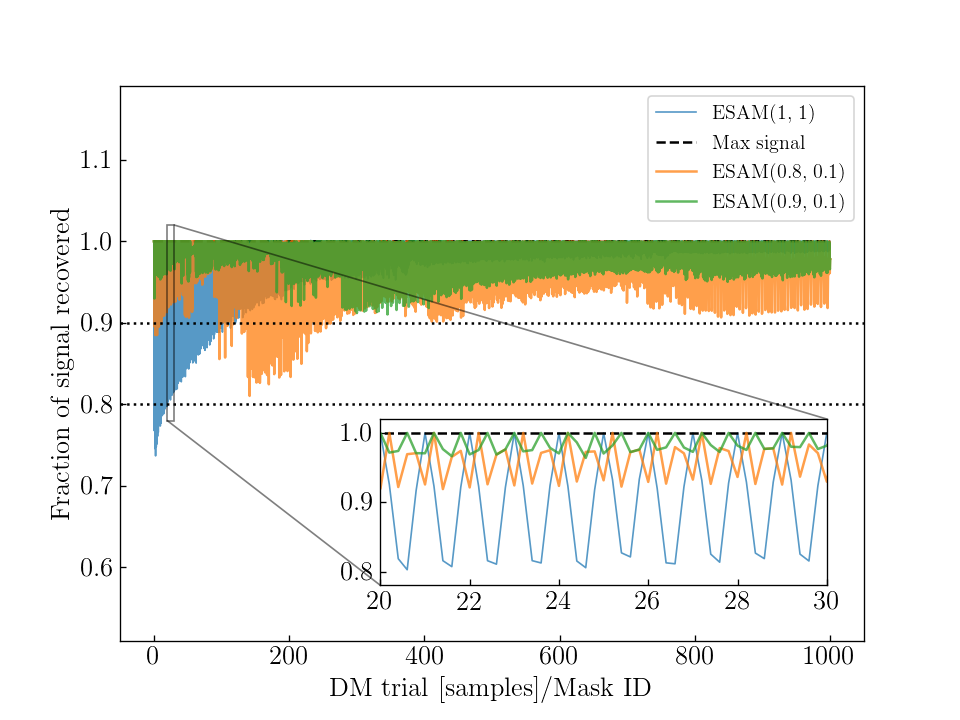

In [31]:
# set up main fig/axes
fig, main_ax = plt.subplots(figsize=(8,6))
inset_ax = main_ax.inset_axes(
   [0.35, 0.1, 0.6, 0.3],  # [x, y, width, height] w.r.t. axes
   xlim=[20, 30], ylim=[0.78, 1.02], # sets viewport & tells relation to main axes
   # xticklabels=[], yticklabels=[]
)

# add plot content


for ax in main_ax, inset_ax:
    ax.plot(esam_snrs_1['DM'].iloc[0:-2], esam_snrs_1['ESAM_snr'].iloc[0:-2]/esam_snrs_1['Max_snr'].iloc[0:-2], alpha=0.75, lw=1,label="ESAM(1, 1)")

    ax.plot(esam_snrs_p9['DM'][::1], esam_snrs_p9['Max_snr'][::1] / esam_snrs_p9['Max_snr'][::1], 'k--', label="Max signal")
    #ax.plot(fdmt_snrs['DM'][::2], fdmt_snrs['BZ_FDMT_snr'][::2] / fdmt_snrs['Max_snr'][::2], alpha=0.75, label="FDMT")
    ax.plot(esam_snrs_p8['DM'], esam_snrs_p8['ESAM_snr'] / esam_snrs_p8['Max_snr'], alpha=0.75, label="ESAM(0.8, 0.1)")
    ax.plot(esam_snrs_p9['DM'], esam_snrs_p9['ESAM_snr'] / esam_snrs_p9['Max_snr'], alpha=0.75, label="ESAM(0.9, 0.1)")
    
    
#secax = main_ax.secondary_xaxis('top', functions=(dm_samp_to_pccc, dm_pccc_to_samp))
#secax.set_xlabel('DM trial [pc/cc]')


main_ax.set_ylim(0.51, 1.19)
main_ax.legend(loc='upper right', prop={'size': 12})

main_ax.axhline(0.8, ls=':', c='k')
main_ax.axhline(0.9, ls=':', c='k')
# add zoom leaders
main_ax.indicate_inset_zoom(inset_ax, edgecolor="black")

main_ax.set_ylabel("Fraction of signal recovered")
main_ax.set_xlabel("DM trial [samples]/Mask ID")

fig.savefig("Frac of signal.png")

# Compute cost

In [32]:
fdmt_pc = pd.read_csv("product_counts_for_final_optimised_fdmt_tree_fast_with_traces_0_1000_1.0_nch256_threshold_1.0.pkl.txt", sep="\s+")
esam_p8_pc = pd.read_csv("optimised_trees/product_counts_for_final_optimised_esam_tree_fast_with_traces_0_1000_0.1_nch256_threshold_0.8.pkl.txt", sep="\s+")
esam_p9_pc = pd.read_csv("optimised_trees/product_counts_for_final_optimised_esam_tree_fast_with_traces_0_1000_0.1_nch256_threshold_0.9.pkl.txt", sep="\s+")
esam_p1_pc = pd.read_csv("optimised_trees/product_counts_for_final_optimised_esam_tree_fast_with_traces_0_1000_1.0_nch256_threshold_1.0.pkl.txt", sep="\s+")

In [33]:
bf_pc = pd.read_csv("optimised_trees/operation_counts_for_brute_force_implementation_of_final_optimised_esam_tree_fast_with_traces_0_1000_1.0_nch256_threshold_1.0.pkl.txt", sep="\s+")

In [34]:
fdmt_pc.keys()

Index(['N_prods_added', 'Max_dm_added', 'Iter_0', 'Iter_1', 'Iter_2', 'Iter_3',
       'Iter_4', 'Iter_5', 'Iter_6', 'Iter_7', 'Iter_8'],
      dtype='object')

In [35]:
bf_pc.keys()

Index(['N_templates_added', 'Max_dm_added', 'N_operations'], dtype='object')

<IPython.core.display.Javascript object>


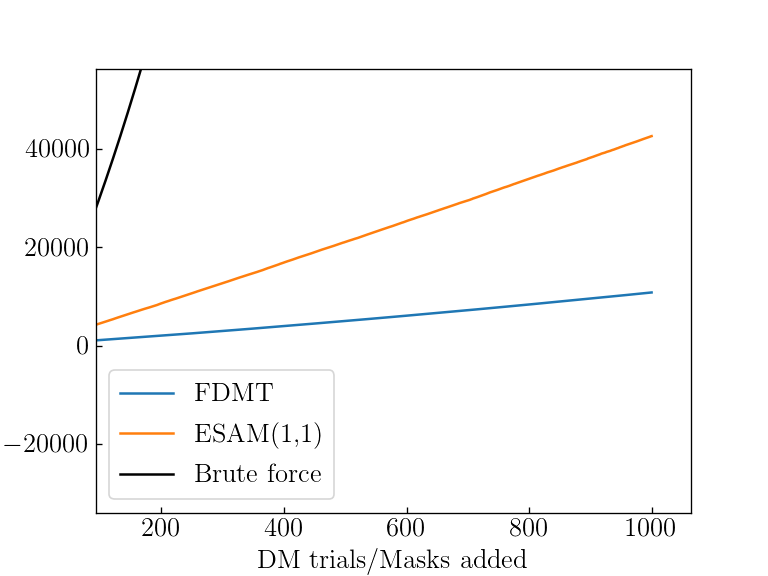

In [39]:
plt.figure()
plt.plot(fdmt_pc['N_prods_added'], fdmt_pc.iloc[:, 2:].sum(axis=1), label="FDMT")
plt.plot(esam_p1_pc['N_prods_added'], esam_p1_pc.iloc[:, 2:].sum(axis=1), label="ESAM(1,1)")
plt.plot(bf_pc['N_templates_added'], bf_pc['N_operations'], c='k', label="Brute force")

plt.yscale("log")
plt.xlabel("DM trials/Masks added")
plt.ylabel("Num of operations")

plt.legend()
plt.savefig("ESAM_FDMT_BF_compute_costs.png")

<IPython.core.display.Javascript object>


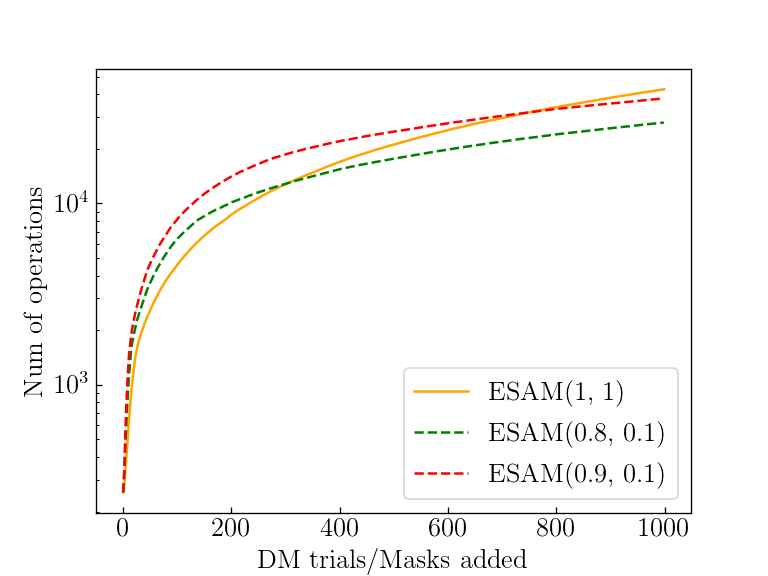

In [40]:
plt.figure()
#plt.plot(fdmt_pc['Max_dm_added'], fdmt_pc.iloc[:, 2:].sum(axis=1), label="FDMT")
plt.plot(esam_p1_pc['Max_dm_added'], esam_p1_pc.iloc[:, 2:].sum(axis=1), c='orange', label="ESAM(1, 1)")
plt.plot(esam_p8_pc['Max_dm_added'], esam_p8_pc.iloc[:, 2:].sum(axis=1), ls='--', c='g', label="ESAM(0.8, 0.1)")
plt.plot(esam_p9_pc['Max_dm_added'], esam_p9_pc.iloc[:, 2:].sum(axis=1), ls='--', c='r', label="ESAM(0.9, 0.1)")

#plt.plot(bf_pc['N_templates_added'], bf_pc['N_operations'], label="Brute force")

plt.yscale("log")
plt.xlabel("DM trials/Masks added")
plt.ylabel("Num of operations")
plt.legend()
plt.savefig("Optimised_tree_compute_costs.png")

## Load the tree to get the butterfly/bowtie plot of the output of ESAM

In [34]:
esam_1_1 = np.load("final_optimised_esam_tree_fast_with_traces_0_1000_1.0_nch256_threshold_1.0.pkl.npy", allow_pickle=True).item()

In [35]:
import sys
sys.path.append("/home/gup037/Codes/ESAM/FDMT_tests/")
from simulate_narrow_frb import make_pure_frb

In [36]:
frb = make_pure_frb(nsamps=1500, dm=500, chw_2=0.5, fchans=np.arange(800, 1056, 1), tpulse=1000, nch = 256, tx = 1000)

/home/gup037/miniconda3/envs/craco/lib/python3.6/site-packages/numba/np/ufunc/parallel.py:365: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [37]:
frb

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 756)

<IPython.core.display.Javascript object>


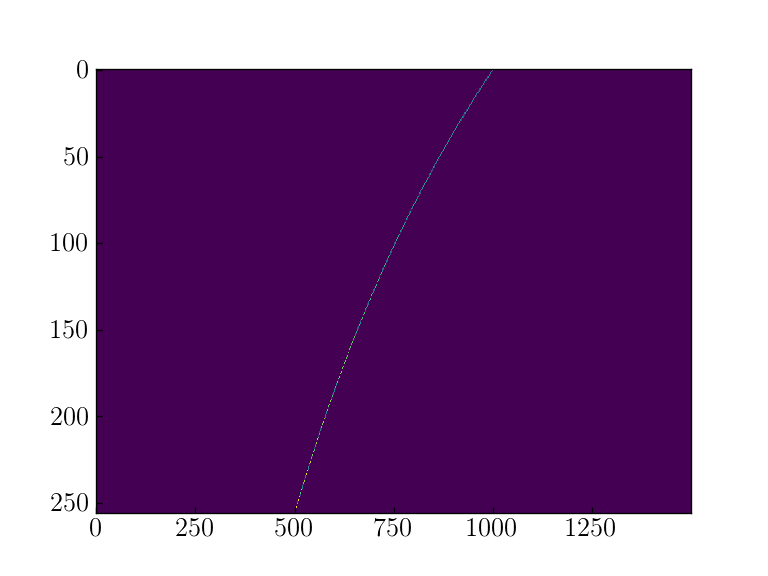

In [38]:
plt.figure()
plt.imshow(frb[0], aspect='auto', interpolation='None')

In [42]:
esam_out = esam_1_1(frb[0])

In [43]:
esam_out.shape

(1000, 1500)

<IPython.core.display.Javascript object>


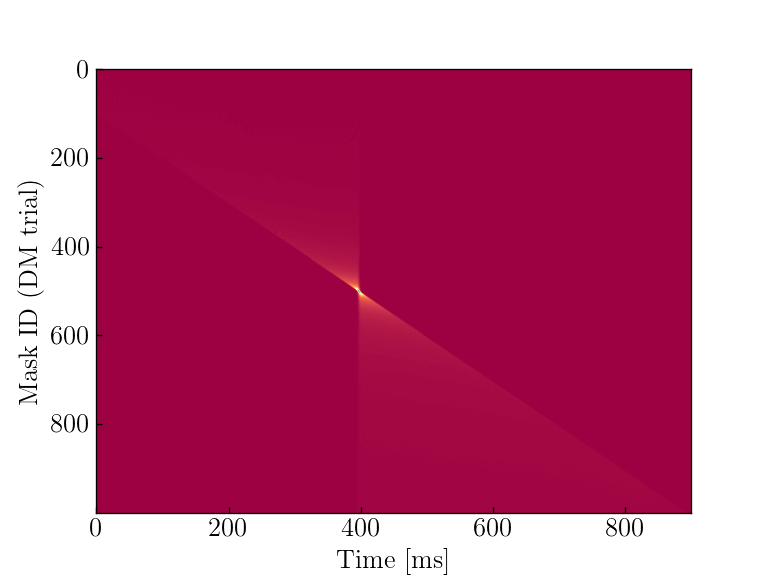

In [44]:
plt.figure()
plt.imshow(esam_out[:, 600:] / np.max(esam_out), aspect='auto', cmap='Spectral')
#plt.colorbar()
plt.xlabel("Time [ms]")
plt.ylabel("Mask ID (DM trial)")
plt.savefig("ESAM bowtie output.png", dpi=300)